In [8]:
from scipy.special import jv
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
import pandas as pd
import matplotlib as mpl
from floquet_simulations.flux_functions import *
from pathlib import Path
from matplotlib.colors import LinearSegmentedColormap
from floquet_simulations.plot_functions import PlotParams
PlotParams(fontsize=10)

In [9]:
data_dir = Path().absolute().parent.parent/"paper_data"/"phases_plot_ft_Ain0-40,w=8.csv"
dfP = pd.read_csv(data_dir,  index_col=False)
radius = 0.05
dfP = dfP[(dfP.DataType == "FT")
          &(dfP.Radius == radius)] 
dfP.columns

Index(['DataType', 'CentreX', 'CentreY', 'Radius', 'nPoints', 'MaxDelta',
       'MaxPhaseOpening', 'MaxPhaseClosing', 'SecondMaxDelta',
       'SecondMaxPhaseOpening', 'SecondMaxPhaseClosing', 'ThirdMaxDelta',
       'ThirdMaxPhaseOpening', 'ThirdMaxPhaseClosing', 'FourthMaxDelta',
       'FourthMaxPhaseOpening', 'FourthMaxPhaseClosing'],
      dtype='object')

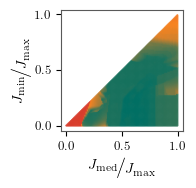

In [73]:
delta_type = "MaxDelta"#"SecondMaxDelta"
gap_type_opening = "MaxPhaseOpening"
gap_type_closing = "MaxPhaseClosing"
save_string = ""


omega0 = 8
cmap = LinearSegmentedColormap.from_list('custom hamiltonians', [ '#006F63', '#F78320', "#C30934"], N=256)
norm = mpl.colors.Normalize(vmin=0, vmax=0.1*pi)
figsize=(4,4)
cm_unit = 1/2.54
fig, ax = plt.subplots(figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit))
sc = ax.scatter(dfP.CentreX, dfP.CentreY, c=dfP[delta_type], 
                norm = norm, s=1, cmap=cmap, marker=".")
ax.set_xticks([0, 0.5,1])
ax.set_yticks([0, 0.5, 1])
ax.set_xlabel(r"$\nicefrac{J_{\mathrm{med}}}{J_{\mathrm{max}}}$",  fontsize=14.9)
ax.set_ylabel(r"$\nicefrac{J_{\mathrm{min}}}{J_{\mathrm{max}}}$", rotation = 90, labelpad=3, fontsize=14.9)
# cbar = plt.colorbar(sc, ticks=[0, 0.1*pi])
# cbar.ax.set_ylabel(r"$\Delta(\phi)_{\mathrm{max}}$", rotation=90, labelpad=-13)
# cbar.ax.set_yticklabels(["0", r"$0.1\pi $"])
plt.savefig(Path().absolute().parent.parent/"figures"/"paper"/"flux_on_lower_triangle.png", format="png", bbox_inches="tight")
plt.show()  


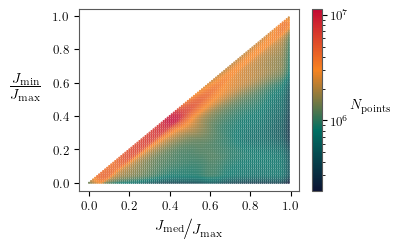

In [45]:
cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ["#0B1333", '#006F63', '#F78320', "#C30934"], N=256)

figsize=(9,6)
cm_unit = 1/2.54
fig, ax = plt.subplots(figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit))
sc = ax.scatter(dfP.CentreX, dfP.CentreY, c=dfP.nPoints, s=1, 
                norm=mpl.colors.LogNorm(), cmap=cmap, marker=".")
ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_xlabel(r"$\nicefrac{J_{\mathrm{med}}}{J_{\mathrm{max}}}$",  fontsize=14.9)
ax.set_ylabel(r"$\frac{J_{\mathrm{min}}}{J_{\mathrm{max}}}$", rotation = 0, labelpad=20, fontsize=14.9)
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel("$N_{\mathrm{points}}$", rotation=0, labelpad=15)
# ax.set_title(type_calc + r", Circle Radius = "+str(radius)+r", $\omega_0 =" + str(omega0) + r"$")
plt.savefig(Path().absolute().parent.parent/"figures"/"paper"/"num_of_points.pdf", format="pdf", bbox_inches="tight")
plt.show()  
        



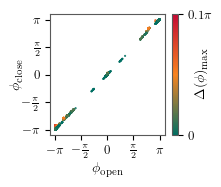

In [7]:
delta_type = "MaxDelta"#"SecondMaxDelta"
gap_type_opening = "MaxPhaseOpening"
gap_type_closing = "MaxPhaseClosing"
save_string = ""
 
cmap = LinearSegmentedColormap.from_list('custom hamiltonians', [ '#006F63', '#F78320', "#C30934"], N=256)
norm = mpl.colors.Normalize(vmin=0, vmax=0.1*pi)

figsize=(4.7,4)
cm_unit = 1/2.54
fig, ax = plt.subplots(figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit))
sc = ax.scatter(dfP[gap_type_opening], dfP[gap_type_closing], c=dfP[delta_type],
                norm = norm,
                s=1, cmap=cmap, marker=".")
ax.set_xticks([-pi, -pi/2, 0,pi/2, pi])
ax.set_xticklabels([r"$-\pi$", r"$-\frac{\pi}{2}$", '0',r"$\frac{\pi}{2}$", r"$\pi$"])
ax.set_yticks([-pi, -pi/2, 0,pi/2, pi])
ax.set_yticklabels([r"$-\pi$", r"$-\frac{\pi}{2}$", '0',r"$\frac{\pi}{2}$", r"$\pi$"])
ax.set_xlabel(r"$\phi_{\mathrm{open}}$")
ax.set_ylabel(r"$\phi_{\mathrm{close}}$", rotation = 90, labelpad=0)
cbar = plt.colorbar(sc, ticks=[0, 0.1*pi])
cbar.ax.set_ylabel(r"$\Delta(\phi)_{\mathrm{max}}$", rotation=90, labelpad=-12)
cbar.ax.set_yticklabels(["0", r"$0.1 \pi$" ])
# ax.set_title(type_calc + r", Circle Radius = "+str(radius)+r", $\omega_0 =" + str(omega0) + r" $")
plt.savefig(Path().absolute().parent.parent/"figures"/"paper"/"gap_openings.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [22]:
print(len(dfP.MaxDelta), len(dfP[dfP.MaxDelta <0.01*pi]), len(dfP[dfP.MaxDelta <0.01*pi])/len(dfP.MaxDelta) )

5050 3518 0.6966336633663366
